# The Rise of LGBT shows
Introduction thing

## Data Description

Our dataset is a collection of information about Netflix shows. Each obsevation contains information about a Netflix show's unique ID, whether it's a movie or TV show, title, director, cast, the country where it was produced, release date, release year, TV rating, duration, genre, and description.

The dataset 'Netflix Movies and TV Shows' was collected from Flixable, a third-party Netflix search engine. Flixable was created in 2018 by Ville Salminen, and it came with additional advanced search functionality which was missing from the implemented search engine of Netflix. The data was extracted from the Flixable database through the use of API calls.

Currently, Netlflix does not have their API publicly available, and Flixable has not openly disclosed how the web site was able to acquire the data for its database. Despite the popularity of the aforementioned site, we cannot confirm whether the dataset that was extracted from Flixable is reliable.

## Exploratory Data Analysis

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree 

In [2]:
netflix_df = pd.read_csv("./netflix_titles.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
netflix_df['director'].unique()

array(['Richard Finn, Tim Maltby', nan, 'Fernando Lebrija', ...,
       'Vikramaditya Motwane, Anurag Kashyap', 'Jung-ah Im', 'Onur Ünlü'],
      dtype=object)

Remove duplicates dito ba?? ewan

#### Checking for `NAN`s

In [4]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

We see here that the `description` and `listed_in` variables do not have `Nan`/`null` values. Hence, no need to drop rows (for this question, at least) or do imputation. 

#### Checking for duplicates

The `description` variable is a good feature to check for duplicates as the synopsis are expectedly unique for each show.

In [5]:
netflix_desc_duplicate = netflix_df['description'].value_counts().reset_index(name="description").query("description > 1")
print(netflix_desc_duplicate)
print("Repeated descriptions:", len(netflix_desc_duplicate))
print("Repeated shows:", netflix_desc_duplicate['description'].sum())

                                               index  description
0  A surly septuagenarian gets another chance at ...            3
1  An aspiring musician battles age-old caste div...            2
2  A ruthless businessman’s mission to expose ele...            2
3  A young Han Solo tries to settle an old score ...            2
4  As a series of murders hit close to home, a vi...            2
5  An affable, newly appointed college warden pro...            2
6  When Elastigirl gets recruited for a high-prof...            2
Repeated descriptions: 7
Repeated shows: 15


There are 7 repeated descriptions, and a total of 15 repeated shows based on our assumption that observations with the same description are the same show. To further confirm this, we can look at the other variables of the observations corresponding to these descriptions.

In [6]:
netflix_df.loc[netflix_df["description"].isin(netflix_desc_duplicate["index"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
119,81186758,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 25, 2019",2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
120,81186757,Movie,Oh! Baby (Tamil),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 25, 2019",2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
252,81093951,Movie,Oh! Baby,B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 14, 2019",2019,TV-14,157 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
2123,81075235,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...
2124,81072516,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...
2312,81083971,Movie,Sarvam Thaala Mayam (Tamil Version),Rajiv Menon,"G.V. Prakash Kumar, Nedumudi Venu, Aparna Bala...",India,"March 1, 2019",2018,TV-14,131 min,"Dramas, International Movies, Music & Musicals",An aspiring musician battles age-old caste div...
3184,80220814,Movie,Solo: A Star Wars Story,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,"January 9, 2019",2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...
3185,81046962,Movie,Solo: A Star Wars Story (Spanish Version),Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,"January 9, 2019",2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...
3242,80221639,Movie,The Incredibles 2,Brad Bird,"Craig T. Nelson, Holly Hunter, Samuel L. Jacks...",United States,"January 30, 2019",2018,PG,118 min,"Children & Family Movies, Comedies",When Elastigirl gets recruited for a high-prof...
3752,81059388,Movie,Incredibles 2 (Spanish Version),Brad Bird,"Víctor Trujillo, Consuelo Duval, Darío T. Pie,...",United States,"February 8, 2019",2018,PG,118 min,"Children & Family Movies, Comedies",When Elastigirl gets recruited for a high-prof...


Closely examining the observations reveals that the only differences in the observations are the `date_added` and the `title` variables. The date when the show is added doesn't give much insight as it does not give relevant context to the similarity of the show (i.e. different versions of a show can be added at different times, and vice versa). However, the title &mdash; at least in the results above &mdash; are descriptive in the differences.

The titles show that there are multiple versions due to langauge. The show *The Incredibles 2*, for instance, has both the original, and the Spanish version. Meanwhile, the movie *Oh! Baby* has two other versions: the Malalayam and Tamil. The only observation which didn't show any difference was for the movie *Sarkar* whose titles (there are 2 observations for this movie) do not indicate versions. This may either be a data collection error, or the title simply does not show which version it is.

Nonetheless, all the duplicates will be cleaned in the same way. The "original" version (i.e. the one without a parenthesis stating the version, or if not applicable, the first entry that appears in the dataset for simplicity) will be retained. 

This step is important because duplicates will affect the weight of the words during feature extraction. Thus, there would be bias for a particular show which would produce results that are not representative of the show's listed genre.

Because there are only few duplicates, we can manually remove the offending observations via `show_id`.

In [7]:
show_id_remove_list = [81186758, 81186757, 81072516, 81046962, 81059388, 81151877, 81074135, 81091424]

netflix_df.loc[(netflix_df["description"].isin(netflix_desc_duplicate["index"])) & (~netflix_df["show_id"].isin(show_id_remove_list))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
252,81093951,Movie,Oh! Baby,B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 14, 2019",2019,TV-14,157 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
2123,81075235,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...
2312,81083971,Movie,Sarvam Thaala Mayam (Tamil Version),Rajiv Menon,"G.V. Prakash Kumar, Nedumudi Venu, Aparna Bala...",India,"March 1, 2019",2018,TV-14,131 min,"Dramas, International Movies, Music & Musicals",An aspiring musician battles age-old caste div...
3184,80220814,Movie,Solo: A Star Wars Story,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,"January 9, 2019",2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...
3242,80221639,Movie,The Incredibles 2,Brad Bird,"Craig T. Nelson, Holly Hunter, Samuel L. Jacks...",United States,"January 30, 2019",2018,PG,118 min,"Children & Family Movies, Comedies",When Elastigirl gets recruited for a high-prof...
4879,81151880,Movie,Game Over (Hindi Version),Ashwin Saravanan,"Taapsee Pannu, Vinodhini, Parvathi T, Ramya Su...","India, Turkey","August 21, 2019",2019,TV-MA,98 min,"Horror Movies, International Movies, Thrillers","As a series of murders hit close to home, a vi..."
5212,81091423,Movie,Petta,Karthik Subbaraj,"Rajnikanth, Vijay Sethupathi, M. Sasikumar, Na...",India,"April 5, 2019",2019,TV-14,170 min,"Action & Adventure, Comedies, Dramas","An affable, newly appointed college warden pro..."


The above shows the observations that will be retained from all the duplicates.

In [8]:
netflix_df_2 = netflix_df[~netflix_df["show_id"].isin(show_id_remove_list)]
netflix_df_2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


Exploratory questions:

1. Most recurring genres in the dataset

In [38]:
listed_in_series = netflix_df_2['listed_in']
genre_matrix = []

for string in listed_in_series:
    split_str = string.split(', ')
    genre_matrix.append(split_str)

genre_df = pd.DataFrame(genre_matrix)
genre_list = pd.concat([genre_df[0], genre_df[1], genre_df[2]])
genre_list.dropna(inplace = True)
genre_list


0       Children & Family Movies
1                Stand-Up Comedy
2                       Kids' TV
3                       Kids' TV
4                       Comedies
                  ...           
6204       TV Action & Adventure
6205                 TV Comedies
6218                 TV Comedies
6221         TV Sci-Fi & Fantasy
6224                   TV Dramas
Length: 13647, dtype: object

Text(0.5, 1.0, 'Bar plot of genre count in Netflix shows')

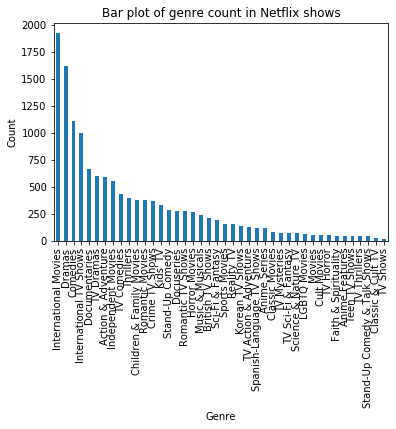

In [39]:
genre_count = genre_list.value_counts()

genre_count.plot.bar()
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Bar plot of genre count in Netflix shows')

In [9]:
netflix_df_2.insert(12, "isLGBT", netflix_df_2["listed_in"].str.find("LGBT") != -1, True)
netflix_df_2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,isLGBT
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,False
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,False
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",False
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,False
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",False
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",False
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,False
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",False


In [10]:
netflix_df_lgbt = netflix_df_2[netflix_df_2["isLGBT"] == True]
netflix_df_lgbt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,isLGBT
159,81122669,Movie,Daddy Issues,Amara Cash,"Madison Lawlor, Montana Manning, Andrew Pifko,...",United States,"September 20, 2019",2019,TV-MA,82 min,"Dramas, Independent Movies, LGBTQ Movies",Maya finally hooks up with her online dream gi...,True
399,80173269,Movie,Who the F**k Is That Guy?,Drew Stone,Michael Alago,United States,"September 1, 2017",2017,TV-MA,78 min,"Documentaries, LGBTQ Movies, Music & Musicals",Take a ride through the life of record exec Mi...,True
441,80189623,Movie,The Death and Life of Marsha P. Johnson,David France,NaN,United States,"October 6, 2017",2017,TV-MA,106 min,"Documentaries, LGBTQ Movies",As she fights the tide of violence against tra...,True
746,80216844,Movie,Feminists: What Were They Thinking?,Johanna Demetrakas,NaN,United States,"October 12, 2018",2018,TV-MA,86 min,"Documentaries, LGBTQ Movies",Revisiting 1970s photos of women that captured...,True
1013,80201542,Movie,Let It Snow,Luke Snellin,"Isabela Moner, Shameik Moore, Kiernan Shipka, ...",United States,"November 8, 2019",2019,PG-13,93 min,"Comedies, Dramas, LGBTQ Movies",A snowstorm hits a small town on a cold Christ...,True
1019,81002596,Movie,Yes or No 2,Saratswadee Wongsomphet,"Supanart Jittaleela, Sushar Manaying, Nisa Boo...",Thailand,"November 8, 2018",2012,TV-PG,112 min,"International Movies, LGBTQ Movies, Romantic M...","No longer university girls, Kim and Pie face n...",True
1020,81002597,Movie,Yes or No 2.5,Kirati Nakintanon,"Supanart Jittaleela, Pimpakan Bangchawong, Cha...",Thailand,"November 8, 2018",2015,TV-PG,107 min,"International Movies, LGBTQ Movies, Romantic M...",Roommates Wine and Pie find their lives turned...,True
1217,81020531,Movie,Ana e Vitória,Matheus Souza,"Ana Caetano, Vitória Falcão, Clarissa Müller, ...",Brazil,"November 2, 2018",2018,TV-14,116 min,"Comedies, International Movies, LGBTQ Movies","After meeting by chance, two young musicians w...",True
1236,80079470,Movie,Naomi and Ely's No Kiss List,Kristin Hanggi,"Victoria Justice, Pierson Fode, Matthew Daddar...",United States,"November 18, 2015",2015,NR,91 min,"Comedies, Dramas, LGBTQ Movies","Naomi and her gay best friend, Ely, have been ...",True
1325,70117297,Movie,A Single Man,Tom Ford,"Colin Firth, Julianne Moore, Nicholas Hoult, G...",United States,"November 11, 2019",2009,R,100 min,"Dramas, Independent Movies, LGBTQ Movies",This stream-of-consciousness drama centers on ...,True


## Research Question

## Data Modelling

### What are the most common association rules among Netflix genres?

#### Subheader

### Are Netflix descriptions effective classifiers for the LGBTQ genre?

The `description` variable in the dataset refers to Netflix's synopsis of each show. DESCRIBE MORE

## Insights and Conclusions